# BLEU Score

In [1]:
import pandas as pd
import nltk
from nltk.translate.bleu_score import sentence_bleu
from nltk import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')

! pip install POT
import pandas as pd
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import seaborn as sns
import ot

# Set model number and file paths
model_number = 4
finetuned_result = f"models_evaluate/model_{model_number}/model_output/finetuned_results.csv"
pretrained_result = f"models_evaluate/model_{model_number}/model_output/pretrained_results.csv"

def calculate_bleu(reference, candidate):
    '''
    Calculate BLEU score between a reference and a candidate sentence.
    
    Parameters:
    reference (str): The reference sentence.
    candidate (str): The candidate sentence.
    
    Returns:
    bleu_score (float): The BLEU score of the candidate sentence.
    '''
    # Tokenize the sentences
    reference_tokens = word_tokenize(reference)
    candidate_tokens = word_tokenize(candidate)

    # Calculate BLEU score
    bleu_score = sentence_bleu([reference_tokens], candidate_tokens, weights=(1, 0, 0, 0))
    return bleu_score

def calculate_and_format(row):
    bleu_score = calculate_bleu(row['True Neutral Text'], row['Predicted Neutral Text'])
    return row['Predicted Neutral Text'], row['True Neutral Text'], bleu_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\10150\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Fine-tuned Model BLEU Score

In [2]:
df_finetuned = pd.read_csv(finetuned_result, encoding='ISO-8859-1')

output_bleu_finetuned = df_finetuned.apply(calculate_and_format, axis=1).tolist()

# Create a DataFrame
df_bleu_finetuned = pd.DataFrame(output_bleu_finetuned, columns=['Predicted Neutral Text', 'True Neutral Text', 'BLEU Score'])

# Add a sequence column
df_bleu_finetuned.insert(0, 'Sequence', range(1, 1 + len(df_bleu_finetuned)))

# Save to CSV
df_bleu_finetuned.to_csv(f'models_evaluate/model_{model_number}/evaluate_result/bleu_score_finetuned.csv', index=False)

# Print the counts
print(f"Total number of sentence pairs used for calculation: {df_bleu_finetuned.shape[0]}")
print(f"Average BLEU score: {df_bleu_finetuned['BLEU Score'].mean()}")
print(f"Number of BLEU scores less than 0.2: {(df_bleu_finetuned['BLEU Score'] < 0.2).sum()}")

Total number of sentence pairs used for calculation: 257
Average BLEU score: 0.8477726764959419
Number of BLEU scores less than 0.2: 15


c:\Users\10150\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\10150\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\10150\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnin

## Pretrained Model BLEU Score

In [3]:
df_pretrained = pd.read_csv(pretrained_result, encoding='ISO-8859-1')

output_bleu_pretrained = df_pretrained.apply(calculate_and_format, axis=1).tolist()

# Create a DataFrame
df_bleu_pretrained = pd.DataFrame(output_bleu_pretrained, columns=['Predicted Neutral Text', 'True Neutral Text', 'BLEU Score'])

# Add a sequence column
df_bleu_pretrained.insert(0, 'Sequence', range(1, 1 + len(df_bleu_pretrained)))

# Save to CSV
df_bleu_pretrained.to_csv(f'models_evaluate/model_{model_number}/evaluate_result/bleu_score_pretrained.csv', index=False)

# Print the counts
print(f"Total number of sentence pairs used for calculation: {df_bleu_pretrained.shape[0]}")
print(f"Average BLEU score: {df_bleu_pretrained['BLEU Score'].mean()}")
print(f"Number of BLEU scores less than 0.1: {(df_bleu_pretrained['BLEU Score'] < 0.1).sum()}")

Total number of sentence pairs used for calculation: 179
Average BLEU score: 0.2883676279398233
Number of BLEU scores less than 0.1: 102


c:\Users\10150\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\10150\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\10150\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnin

## BLEU Score Visualizations

### Histograms

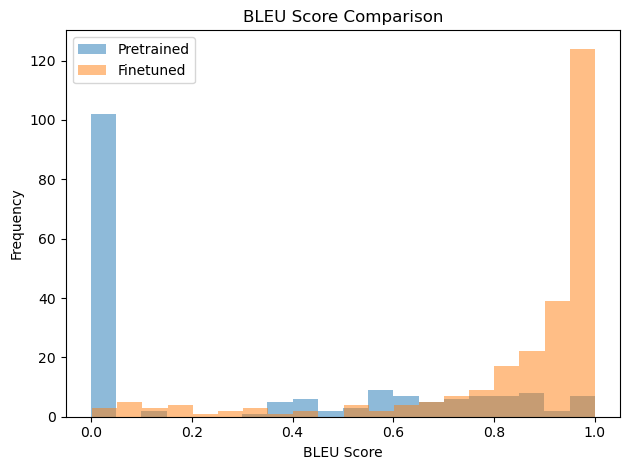

In [4]:
# Plot the histograms
plt.figure(tight_layout=True)
plt.hist(df_bleu_pretrained['BLEU Score'], bins=20, alpha=0.5, label='Pretrained')
plt.hist(df_bleu_finetuned['BLEU Score'], bins=20, alpha=0.5, label='Finetuned')
plt.title('BLEU Score Comparison')
plt.xlabel('BLEU Score')
plt.ylabel('Frequency')
plt.legend()

plt.show()

### KDE Plots

c:\Users\10150\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\10150\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


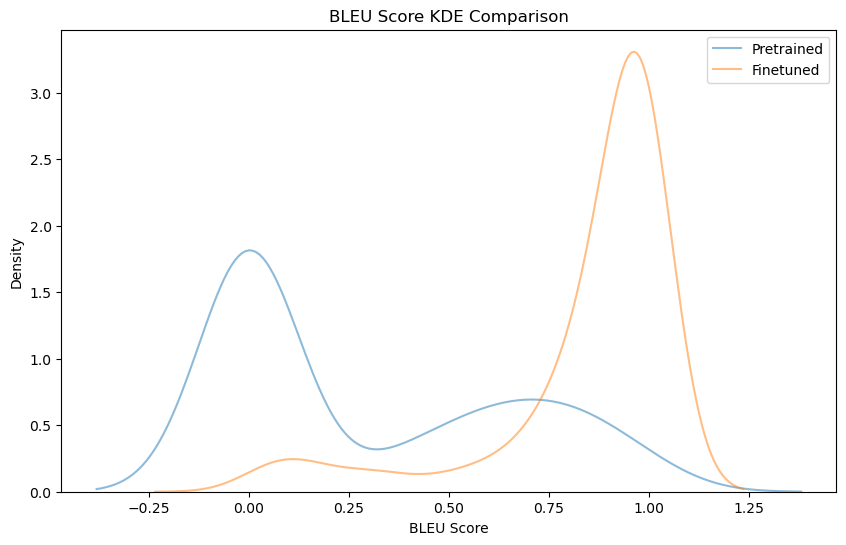

In [5]:
# Plot the KDE plots
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_bleu_pretrained, x='BLEU Score', label='Pretrained', alpha=0.5)
sns.kdeplot(data=df_bleu_finetuned, x='BLEU Score', label='Finetuned', alpha=0.5)
plt.title('BLEU Score KDE Comparison')
plt.xlabel('BLEU Score')
plt.ylabel('Density')
plt.legend()

plt.show()

# Evaluate WMD(Word Mover's Distance)

In [6]:
# Load the Google's pre-trained Word2Vec model.
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

# Set model number and file paths
# model_number = 4
# finetuned_result = f"models_evaluate/model_{model_number}/model_output/finetuned_results.csv"
# pretrained_result = f"models_evaluate/model_{model_number}/model_output/pretrained_results.csv"

# Define a function to calculate Word Mover's Distance and format output
def calculate_and_format(row):
    true_neutral_text = row['True Neutral Text']
    predicted_text = row['Predicted Neutral Text']
    wmd = model.wmdistance(true_neutral_text, predicted_text)
    return true_neutral_text, predicted_text, wmd

## Finetuned Model WMD

In [7]:
df_finetuned = pd.read_csv(finetuned_result)
results_wmd_finetuned = df_finetuned.apply(calculate_and_format, axis=1)

# Create a new DataFrame to store the results
df_wmd_finetuned = pd.DataFrame(results_wmd_finetuned.tolist(), columns=['True Neutral Text', 'Predicted Neutral Text', 'wmd'])

# Save
df_wmd_finetuned.to_csv(f'models_evaluate/model_{model_number}/evaluate_result/bleu_wmd_finetuned.csv', index=False)

print(f"The average Word Mover's Distance is {df_wmd_finetuned['wmd'].mean()}")

The average Word Mover's Distance is 0.06118579765632293


## Pretrained Model WMD

In [8]:
df_pretrained = pd.read_csv(pretrained_result)
results_wmd_pretrained = df_pretrained.apply(calculate_and_format, axis=1)

# Create a new DataFrame to store the results
df_wmd_pretrained = pd.DataFrame(results_wmd_pretrained.tolist(), columns=['True Neutral Text', 'Predicted Neutral Text', 'wmd'])

# Save
df_wmd_pretrained.to_csv(f'models_evaluate/model_{model_number}/evaluate_result/bleu_wmd_pretrained.csv', index=False)

print(f"The average Word Mover's Distance is {df_wmd_pretrained['wmd'].mean()}")

The average Word Mover's Distance is 0.2897598459332061


## WMD(Word Mover's Distance) Visualizations

### Histograms

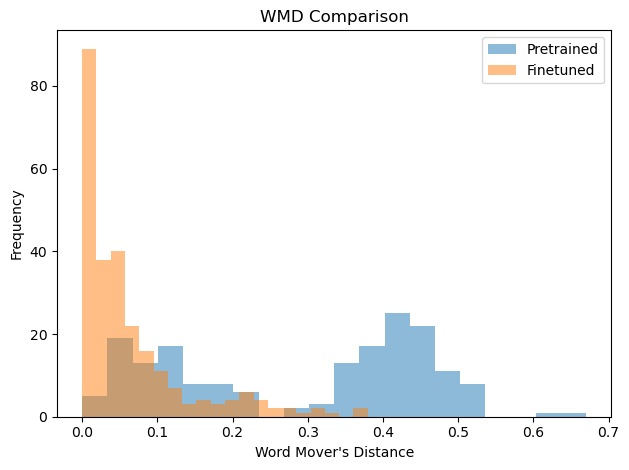

In [9]:
# Plot a histogram of 'wmd'
plt.figure(tight_layout=True)
plt.hist(df_wmd_pretrained['wmd'], bins=20, alpha=0.5, label='Pretrained')
plt.hist(df_wmd_finetuned['wmd'], bins=20, alpha=0.5, label='Finetuned')
plt.title('WMD Comparison')
plt.xlabel('Word Mover\'s Distance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### KDE Plots

c:\Users\10150\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\10150\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


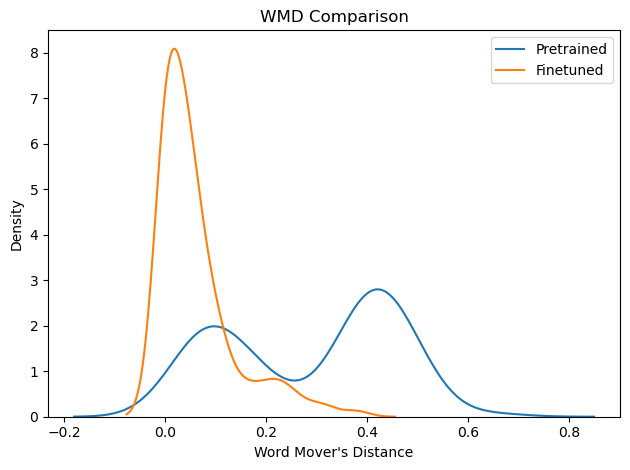

In [10]:
import seaborn as sns

# Plot a KDE of 'wmd'
plt.figure(tight_layout=True)
sns.kdeplot(df_wmd_pretrained['wmd'], label='Pretrained')
sns.kdeplot(df_wmd_finetuned['wmd'], label='Finetuned')
plt.title('WMD Comparison')
plt.xlabel('Word Mover\'s Distance')
plt.ylabel('Density')
plt.legend()
plt.show()